# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/hong/Downloads/traffic-signs-data/train.p"
testing_file = "/Users/hong/Downloads/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
print('X_train.shape={}, y_train.shape={}'.format(X_train.shape, y_train.shape))
print('X_test.shape={}, y_test.shape={}'.format(X_test.shape, y_test.shape))
print('X_train len={}'.format(X_train.shape[0]))
print('X_train image shape={}'.format(X_train.shape[1:4]))
print("Image Shape: {}".format(X_train[0].shape))

X_train.shape=(39209, 32, 32, 3), y_train.shape=(39209,)
X_test.shape=(12630, 32, 32, 3), y_test.shape=(12630,)
X_train len=39209
X_train image shape=(32, 32, 3)
Image Shape: (32, 32, 3)


In [3]:
print('X_train[0].shape={}, X_train[0]={}'.format(X_train[0].shape, X_train[0][0][0:3]))

X_train[0].shape=(32, 32, 3), X_train[0]=[[75 78 80]
 [74 76 78]
 [83 84 83]]


In [4]:
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

In [5]:
import numpy as np
labels, labels_indices, labels_counts = np.unique(y_train, return_index=True, return_counts=True)
print('labels={}'.format(labels))
print('labels_counts={}'.format(labels_counts))
print('labels_indices={}'.format(labels_indices))
print('num unique labels={}'.format(labels.shape[0]))
print('num labels={}'.format(labels_counts.sum()))

labels=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
labels_counts=[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
labels_indices=[    0   210  2430  4680  6090  8070  9930 10350 11790 13200 14670 16680
 18000 20100 22260 23040 23670 24090 25200 26400 26610 26970 27300 27690
 28200 28470 29970 30570 30810 31350 31620 32070 32850 33090 33779 34199
 35399 35789 35999 38069 38369 38729 38969]
num unique labels=43
num labels=39209


In [6]:
# the example files have four sets of data
# features: rgb values for 32x32 images
# labels: a number denoting the feature class
# sizes: original individual example image size
# coords: bounding box of actual traffic sign in image, top-left and bottom-right corners
# sizes and coords are probably not relevant to solving this project
train_sizes, train_coords = train['sizes'], train['coords']
print('train_sizes.shape={}, train_coords.shape={}'.format(train_sizes.shape, train_coords.shape))
print('train_sizes[0:5]={}, train_coords[0:5]={}'.format(train_sizes[0:5], train_coords[0:5]))

train_sizes.shape=(39209, 2), train_coords.shape=(39209, 4)
train_sizes[0:5]=[[29 30]
 [30 30]
 [30 30]
 [31 31]
 [30 32]], train_coords[0:5]=[[ 5  6 24 25]
 [ 5  5 25 25]
 [ 5  5 25 25]
 [ 5  5 26 26]
 [ 5  6 25 26]]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [7]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = labels.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

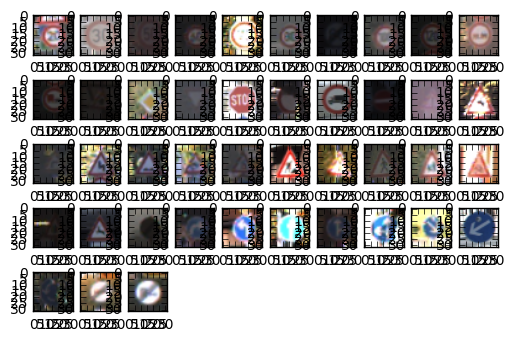

In [8]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

fig = plt.figure()

i = 1
for index in labels_indices:
    #print('i={}, index={}'.format(i, index)) ### can't have prints in this loop or image does not display
    
    a = fig.add_subplot(5,10,i)
    image = X_train[index].squeeze()

    plt.imshow(image)
    i += 1
    
# plt.show()

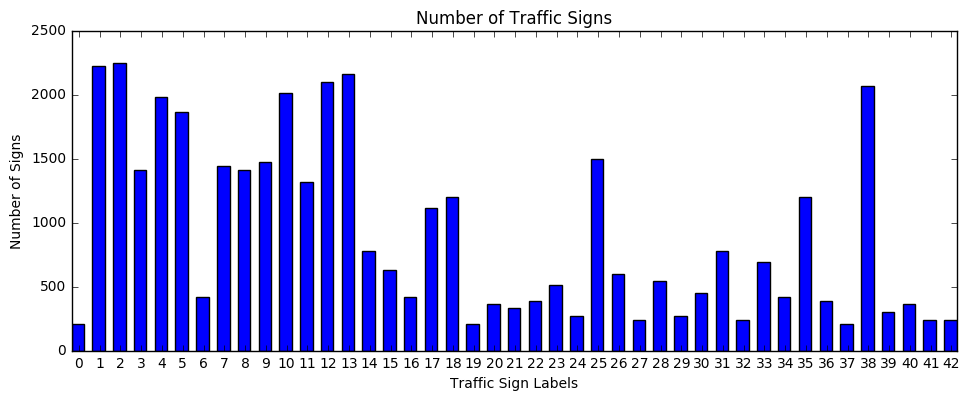

In [9]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
indexes = np.arange(len(labels))

plt.xticks(indexes + 0.35, labels)
plt.ylabel('Number of Signs')
plt.xlabel('Traffic Sign Labels')

width = 0.6
plt.bar(indexes, labels_counts, width )
plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)

plt.title('Number of Traffic Signs')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.

import tensorflow as tf


In [11]:
# convert to grayscale

# rgb2gray function calculates gray value by weighting rgb values differently to match human perception?
def rgb2gray_weighted(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# simple averaging of rgb channels (r+g+b)/3
def rgb2gray(rgb):
    rgb = np.mean(rgb, axis=3,dtype=int)
    
    # wrap value in own array, because? so that it is a one channel array
    # started out with shape (39209, 32, 32, 3), end up with shape (39209, 32, 32, 1)
    # without the resize, it is shape (39209, 32, 32)
    rgb.resize([rgb.shape[0],rgb.shape[1],rgb.shape[2],1])
    return rgb

In [12]:
# convert train set to gray scale
print('X_train[0].shape={}, X_train[0]={}'.format(X_train[0].shape, X_train[0][0][0:3]))

X_train = rgb2gray(X_train)

print('after resize X_train.shape={}'.format(X_train.shape))
print('X_train[0].shape={}, X_train[0]={}'.format(X_train[0].shape, X_train[0][0][0:3]))

X_train[0].shape=(32, 32, 3), X_train[0]=[[75 78 80]
 [74 76 78]
 [83 84 83]]
after resize X_train.shape=(39209, 32, 32, 1)
X_train[0].shape=(32, 32, 1), X_train[0]=[[77]
 [76]
 [83]]


In [13]:
X_test, y_test = test['features'], test['labels']
print('X_test.shape={}, y_test.shape={}'.format(X_test.shape, y_test.shape))

X_test.shape=(12630, 32, 32, 3), y_test.shape=(12630,)


In [14]:
# convert test set to gray scale
print('before resize X_test.shape={}'.format(X_test.shape))
print('X_test[0].shape={}, X_test[0]={}'.format(X_test[0].shape, X_test[0][0][0:3]))

X_test = rgb2gray(X_test)

print('after resize X_test.shape={}'.format(X_test.shape))
print('X_test[0].shape={}, X_test[0]={}'.format(X_test[0].shape, X_test[0][0][0:3]))

before resize X_test.shape=(12630, 32, 32, 3)
X_test[0].shape=(32, 32, 3), X_test[0]=[[116 139 174]
 [116 137 171]
 [118 138 172]]
after resize X_test.shape=(12630, 32, 32, 1)
X_test[0].shape=(32, 32, 1), X_test[0]=[[143]
 [141]
 [142]]


In [15]:
# normalize and scale

# 8 bit value 0-255, 
# normalize by subtracting mean 255/2, 
# scale by dividing by 255 (so value range is -0.5 to 0.5)
# TODO: try scaling to range 0.0 to 1.0 (positive range)
def normalize_grayscale(image_data):
    return (image_data - 255/2)/255
    
X_train = normalize_grayscale( X_train )
print('X_train.shape={}'.format(X_train.shape))
# print('X_train[0]={}'.format(X_train[0][0]))

###TODO process test data set the same way?

X_train.shape=(39209, 32, 32, 1)


In [16]:
X_test = normalize_grayscale( X_test )
# print('X_test[0]={}'.format(X_test[0][0]))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Gray scale because of referenced paper.
Normalize and scale because lecture stated it leads to better gradient descent behavior.


In [17]:
### Generate additional data (OPTIONAL!)
# train set is very uneven, some labels have few examples,
# can generate more samples by jingling existing samples via translation x,y axis,
# and or expand/contract size

### and split the data into training/validation/testing sets here.


### Feel free to use as many code cells as needed.

### Shuffle the data before Splitting
The data read in is in contiguous classes.
If it is not shuffled before splitting, the data will be very unbalanced between train and validation sets.
Also, if it is not shuffled before training, the batched data will be very uniform and lead to very biased weights towards the classes seen so far.

In [18]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [19]:
# see what data looks like after shuffle
labels, labels_indices, labels_counts = np.unique(y_train, return_index=True, return_counts=True)
print('labels={}'.format(labels))
print('labels_counts={}'.format(labels_counts))
print('labels_indices={}'.format(labels_indices))

labels=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
labels_counts=[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
labels_indices=[ 80   8  15  10  23  16  55  71   7  39   2  36  20  19 131  60   1  25
   9 306 120  84  61  77 208  17 181 121  86 234  11  24 191   6   0   3
 368 176  18   5 164   4 112]


In [20]:
# split out training set into train and validation set
# don't touch test set

print('before split: X_train.shape={},y_train.shape={}'.format(X_train.shape, y_train.shape))
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.05, random_state=832289)
print('after split: X_train.shape={},X_train.shape={}'.format(X_train.shape, y_train.shape))

before split: X_train.shape=(39209, 32, 32, 1),y_train.shape=(39209,)
after split: X_train.shape=(37248, 32, 32, 1),X_train.shape=(37248,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The original test set is not touched for training.
The training set is split into a training and validation set.
Default value of validation (test) set size is 25% for sklearn train_test_split function,
chose 0.05% to have more training examples

Data should be generated for classes that have few training examples.

In [21]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    #Y Reshape from 2D to 4D. This prepares the data for
    #Y convolutional and pooling layers.
    ##YH already in correct shape? (37248, 32, 32, 1)
    #     x = tf.reshape(x, (-1, 32, 32, 1))
    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # set weights
    wc1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma))
    strides = 1
    
    # process convolution
    x = tf.nn.conv2d(x, wc1, strides=[1, strides, strides, 1], padding='VALID')
    
    # add bias
    bc1 = tf.Variable(tf.truncated_normal([6], mu, sigma))
    x = tf.nn.bias_add(x, bc1)

    # TODO: Activation. relu = rectificed linear unit
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    k = 2
    x = tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    wc2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma))
    strides = 1
    x = tf.nn.conv2d(x, wc2, strides=[1, strides, strides, 1], padding='VALID')
    
    bc2 = tf.Variable(tf.truncated_normal([16], mu, sigma))
    x = tf.nn.bias_add(x, bc2)
    
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    k = 2
    x = tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    
    # reshape x as 2d matrix, tf.reshape with shape param with axis -1 infers size
    # so reshape with shape = [-1,400] reshapes input tensor to rows with col size = 400
    x = tf.reshape(x, [-1, 400])
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    wd1 = tf.Variable(tf.truncated_normal([5*5*16, 120], mu, sigma))
    bd1 = tf.Variable(tf.truncated_normal([120], mu, sigma))
    x = tf.add(tf.matmul(x, wd1), bd1)

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    #YH TODO: try dropout?
    #     x = tf.nn.dropout(x, dropout)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    wd2 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma))
    bd2 = tf.Variable(tf.truncated_normal([84], mu, sigma))
    x = tf.add(tf.matmul(x, wd2), bd2)
    
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    # 43 classes
    classes = 43
    wd3 = tf.Variable(tf.truncated_normal([84, classes], mu, sigma))
    bd3 = tf.Variable(tf.truncated_normal([classes], mu, sigma))
    x = tf.add(tf.matmul(x, wd3), bd3)
    
    return x

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Starting out with archictecture from LeNet Lab.

LeNext architecture:

Input > conv > activation > max pool > conv > activation > max pool > flatten > fully connected layer > activation > fully connected layer

In [22]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [23]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# one hot encode labels, depth = num classes = 43 
one_hot_y = tf.one_hot(y, 43)

In [24]:
# training pipeline
# Create a training pipeline that uses the model to classify traffic signs data.

rate = 0.001

logits = LeNet(x)
prediction = tf.nn.softmax(logits) # Computes softmax activations.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [25]:
# model evaluation
# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [26]:
# train model

EPOCHS = 3
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.986

EPOCH 2 ...
Validation Accuracy = 0.985

EPOCH 3 ...
Validation Accuracy = 0.988

Model saved


In [27]:
#evaluate model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.898


### TODOS

- re-split train/validation sets and re-train to use different training data
- use larger than 0.05 split for validation set?

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

optimizer: AdamOptimizer

batch size: 128

epochs: 10

learning rate: 0.001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The initial approach is to use the LeNet architecture since it showed good results for the MNIST data set.
The next iteration would attempt the architecture outlined in the reference paper by LeCunn for the traffic signs problem.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

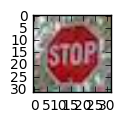

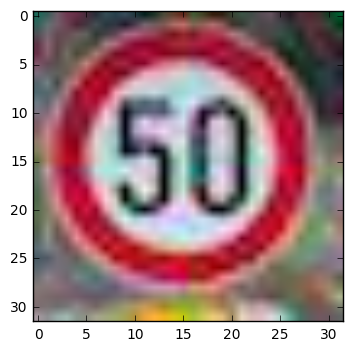

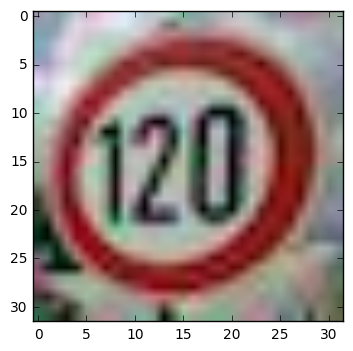

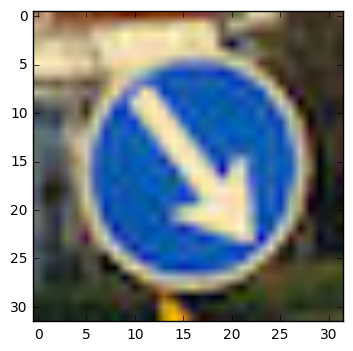

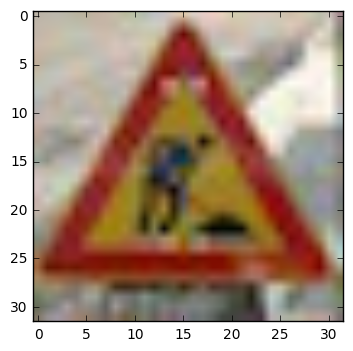

(32, 32, 3) uint8 [[[240 224 224]
  [140 126 125]
  [165 157 155]
  ..., 
  [149 134 115]
  [145 124 105]
  [148 122 105]]

 [[174 162 162]
  [148 138 137]
  [219 214 211]
  ..., 
  [136 125 105]
  [135 118  98]
  [136 115  96]]

 [[152 147 144]
  [174 170 167]
  [193 194 189]
  ..., 
  [124 119  97]
  [139 128 106]
  [131 119  97]]

 ..., 
 [[122 139 121]
  [123 134 118]
  [128 126 114]
  ..., 
  [135 125 126]
  [126 137 131]
  [105 131 120]]

 [[ 91 110  91]
  [118 132 115]
  [ 99  97  85]
  ..., 
  [132 118 118]
  [115 131 121]
  [ 92 126 110]]

 [[ 82 103  84]
  [117 131 114]
  [ 91  88  79]
  ..., 
  [126 110 111]
  [130 146 136]
  [ 83 122 104]]]


In [29]:
# JPEG images are 3 channel RGB images consistent with input data, so are easiest to deal with,
# PNG have a 4th transparency channel, so need a bit more processing

import matplotlib.pyplot as plt 
%matplotlib inline

img_dir = "/Users/hong/udacity/car-nd/CarND-Traffic-Sign-Classifier-Project/signs/"
# image = plt.imread(img_dir + 'stop.jpeg').astype('uint8')
# print('image.shape={}'.format(image.shape))

# # image = image.squeeze()
# plt.figure(figsize=(1,1))
# plt.imshow(image)

image_files = ['stop.jpeg', 'speed50.jpeg', 'speed120.jpeg', 'keep_right.jpeg', 'road_work.jpeg']
images = []
fig = plt.figure(figsize=(1,5))
i = 0
for file in image_files:
    path = img_dir + file
    images.append( plt.imread(path) )
    #     a = fig.add_subplot(1,5,i+1)

    plt.imshow(images[i])
    plt.show()
    i += 1
    
print(images[0].shape, images[0].dtype, images[0])

In [30]:
imgs = np.array(images,dtype = np.float32)
print(imgs.shape)
# print(imgs[0][0:3][0:3][:])

imgs = rgb2gray(imgs)
print(imgs.shape)
# print(imgs[0][0:3][0:3][:])

imgs = normalize_grayscale( imgs )
# print(imgs[0][0])
# imgs = imgs.astype('float32')
print('imgs.shape={}, imgs.dtype={}'.format( imgs.shape, imgs.dtype ))
# print(imgs[0].shape, imgs[0][0])

(5, 32, 32, 3)
(5, 32, 32, 1)
imgs.shape=(5, 32, 32, 1), imgs.dtype=float64


In [31]:
print(imgs[0].shape, imgs[0][0])

(32, 32, 1) [[ 0.39803922]
 [ 0.00980392]
 [ 0.12352941]
 [ 0.27647059]
 [ 0.25686275]
 [ 0.25686275]
 [ 0.31176471]
 [ 0.2372549 ]
 [ 0.10392157]
 [ 0.11176471]
 [ 0.26078431]
 [ 0.08039216]
 [ 0.1       ]
 [ 0.01372549]
 [ 0.14313725]
 [ 0.05686275]
 [ 0.11176471]
 [ 0.12745098]
 [-0.02156863]
 [ 0.1       ]
 [ 0.12352941]
 [-0.0254902 ]
 [ 0.06078431]
 [ 0.08039216]
 [-0.03333333]
 [ 0.02941176]
 [ 0.06470588]
 [-0.08039216]
 [-0.1       ]
 [ 0.01764706]
 [-0.01372549]
 [-0.00980392]]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Images that are similar are difficult to differentiate,
e.g. the speed limit signs look that same except for a single digit inside a circle.

A possible strategy is to use two stages of pipelines.
1. classify into broad classes: red circular speed limits, triangular warnings, blue circular direction signs
2. subsequent stage, refine broad classes, e.g. take signs classified as speed limits and refine into different speed classes.

In [49]:
print(X_test.shape)

(12630, 32, 32, 1)


In [37]:
# images_holder = tf.placeholder(tf.float32, (None, 32, 32, 1))
#             x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# print(images_holder)

# newImagesLogits = LeNet(images_holder)

# softmax prediction
# prediction = tf.nn.softmax(newImagesLogits)

with tf.Session() as sess:
  sess.run(tf.initialize_all_variables())
  saver.restore(sess, tf.train.latest_checkpoint('.'))

  resultLogits = sess.run(logits, feed_dict={ x: imgs })
  new_images_probs = sess.run(prediction, feed_dict={ x: imgs })

print(resultLogits)
print(np.argmax(resultLogits, axis=1))
# print(new_images_probs)
# argmax = np.argmax(new_images_probs, axis=1)
# print(argmax)
# print(np.sum(new_images_probs, axis=1))  

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_4' with dtype float
	 [[Node: Placeholder_4 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_4', defined at:
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-1941178530f2>", line 4, in <module>
    images_holder = tf.placeholder(tf.float32, (None, 32, 32, 1))
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/hong/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_4' with dtype float
	 [[Node: Placeholder_4 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [52]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

images_holder = tf.placeholder(tf.float32, (None, 32, 32, 1))
print(images_holder)

newImagesLogits = LeNet(images_holder)

# softmax prediction
prediction = tf.nn.softmax(newImagesLogits)

with tf.Session() as sess:
  sess.run(tf.initialize_all_variables())
  saver.restore(sess, tf.train.latest_checkpoint('.'))

  resultLogits = sess.run(newImagesLogits, feed_dict={ images_holder: imgs })
  #   new_images_probs = sess.run(prediction, feed_dict={ images_holder: imgs })

print(resultLogits)
print(np.argmax(resultLogits, axis=1))
# print(new_images_probs)
# argmax = np.argmax(new_images_probs, axis=1)
# print(argmax)
# print(np.sum(new_images_probs, axis=1))    


Tensor("Placeholder_12:0", shape=(?, 32, 32, 1), dtype=float32)
[[  1.94633454e-02  -2.12379061e-02   1.17819384e-01   1.81228489e-01
   -1.68438852e-02  -2.97994241e-02   2.80249864e-02   8.03770050e-02
    7.30413124e-02  -4.13973182e-02   4.88712266e-02   3.94285619e-02
    4.22946457e-03  -2.01205343e-01   5.65167516e-03   1.31107032e-01
    4.82042655e-02   8.10535029e-02   2.70076066e-01  -4.94270697e-02
    6.01040497e-02  -1.75363347e-02  -1.55785695e-01   3.49555388e-02
   -1.49594024e-01   6.71167895e-02   4.89884391e-02   1.15852080e-01
   -4.95744012e-02  -9.20604840e-02  -2.09114142e-03  -6.55573457e-02
    2.05618627e-02   2.41059273e-01  -2.21442133e-01   1.96186423e-01
    2.65396424e-02   2.18695387e-01   5.48026487e-02   9.09489542e-02
    2.05357134e-01  -1.26431197e-01   2.19619185e-01]
 [ -6.22421503e-05  -7.34344646e-02   1.86652184e-01   2.34618545e-01
   -2.55064629e-02  -3.01686991e-02   7.29126856e-02   1.59282744e-01
    1.06190115e-01  -1.02635562e-01   7.84

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [33]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.